In [44]:
# Essentials
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Read in dataset
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

train.shape, test.shape

((1460, 80), (1459, 79))

In [5]:
# Preview Training data
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [6]:
# Preview Testing data
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
3         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
4         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       6    2010        WD         Normal  
1        Gar2   12500       6    2010        WD         Normal  
2         NaN       0       3    2010        WD         Normal  
3         NaN       0       6    2010        WD         Normal  
4         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

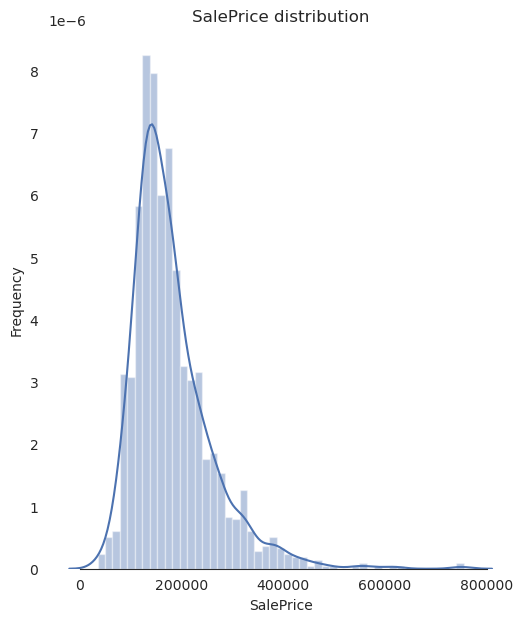

In [7]:
# "SalePrice" distribution
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(6, 7))

sns.distplot(train['SalePrice'], color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [8]:
# Skew and kurt
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


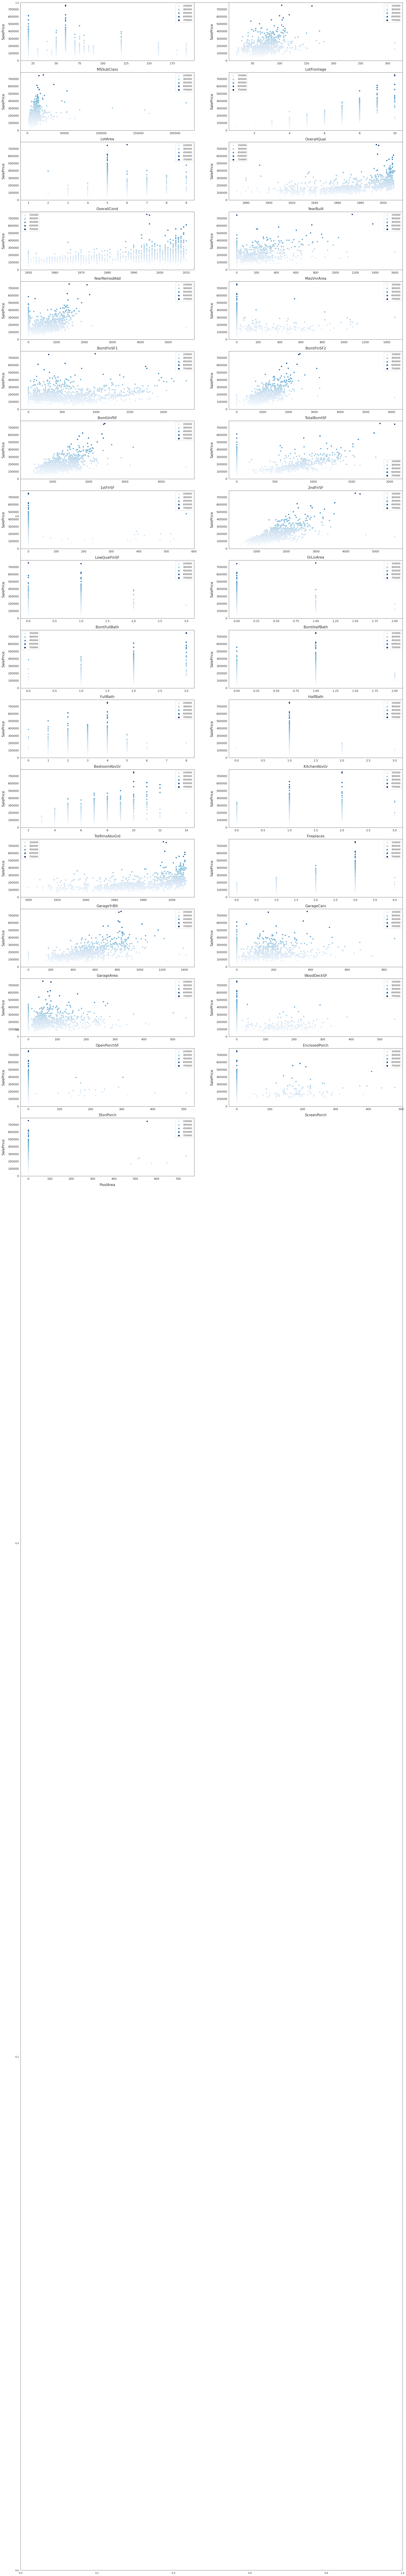

In [9]:
# Showing numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in train.columns:
    if train[i].dtype in numeric_dtypes:
            numeric.append(i)

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(12, 80))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)

for i, feature in enumerate(list(train[numeric]), 1):
    if feature== 'MiscVal':
        break
    plt.subplot(len(list(numeric)), 2, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=train)

    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)

    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)

    plt.legend(loc='best', prop={'size': 10})

plt.show()

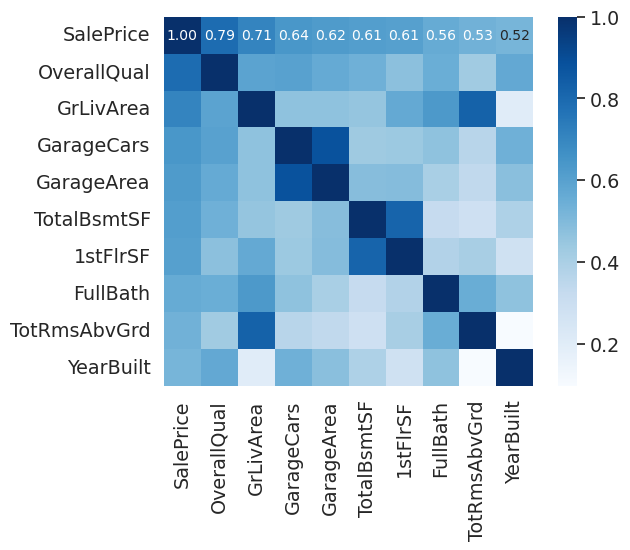

In [10]:
# Sales Price correlation
corr = train.corr(numeric_only=True)
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap="Blues")
plt.show()

(-0.5, 9.5, 0.0, 800000.0)

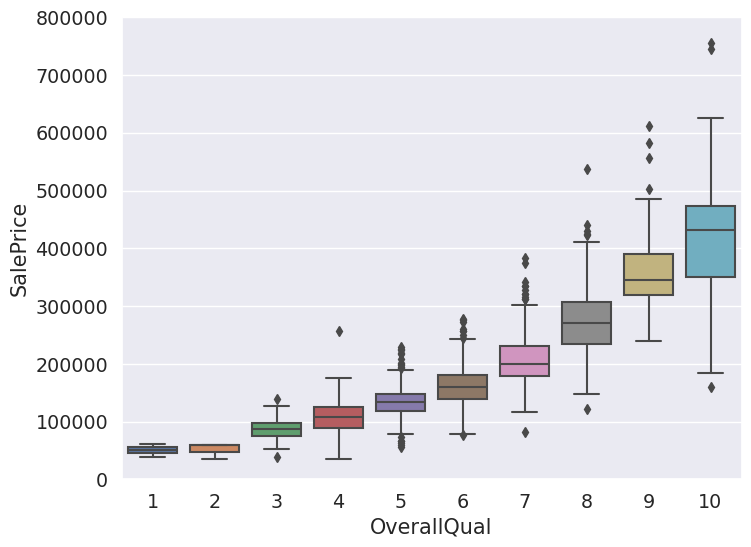

In [11]:
# 'OverallQual' correlation
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

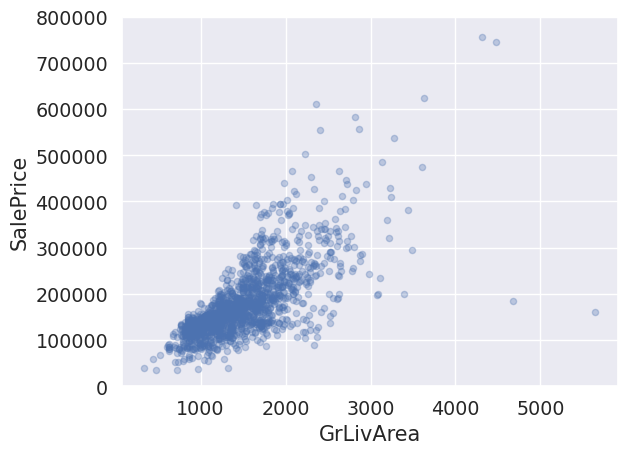

In [12]:
# 'GrLivArea' correlation
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.3, ylim=(0,800000))

(-0.5, 4.5, 0.0, 800000.0)

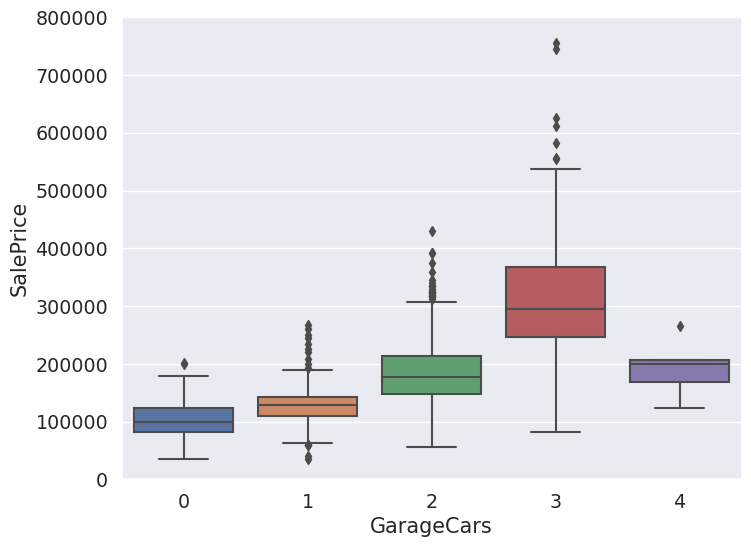

In [13]:
# 'GarageCars' correlation
data = pd.concat([train['SalePrice'], train['GarageCars']], axis=1)
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['GarageCars'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

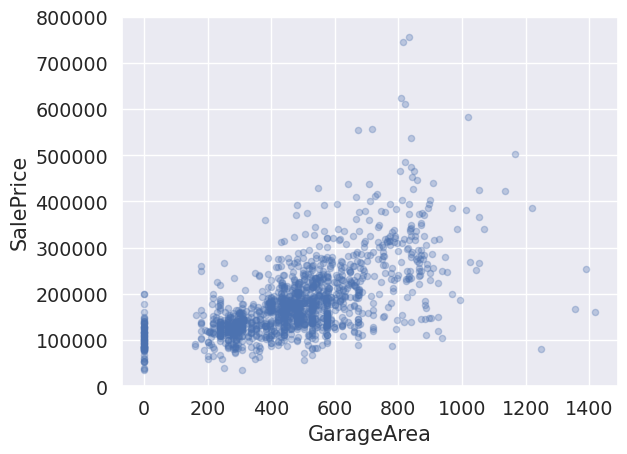

In [14]:
# 'GarageArea' correlation
data = pd.concat([train['SalePrice'], train['GarageArea']], axis=1)
data.plot.scatter(x='GarageArea', y='SalePrice', alpha=0.3, ylim=(0,800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

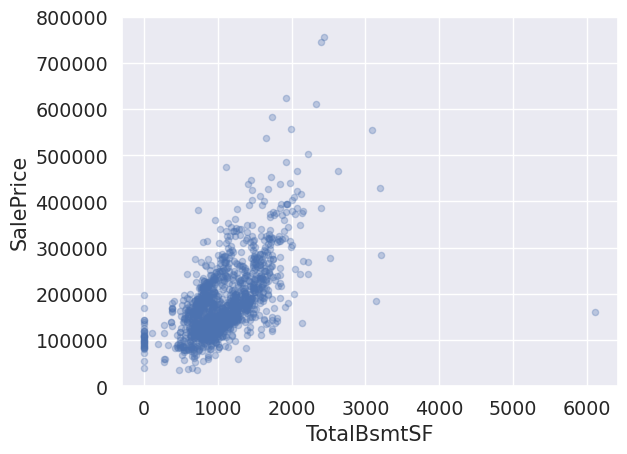

In [15]:
# 'TotalBsmtSF' correlation
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', alpha=0.3, ylim=(0,800000))

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

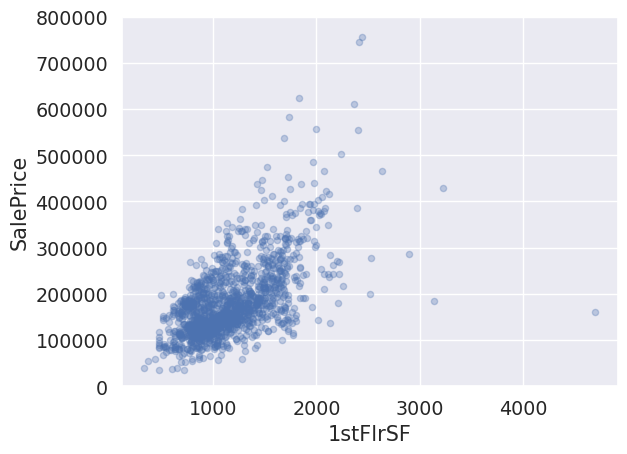

In [16]:
# '1stFlrSF' correlation
data = pd.concat([train['SalePrice'], train['1stFlrSF']], axis=1)
data.plot.scatter(x='1stFlrSF', y='SalePrice', alpha=0.3, ylim=(0,800000))

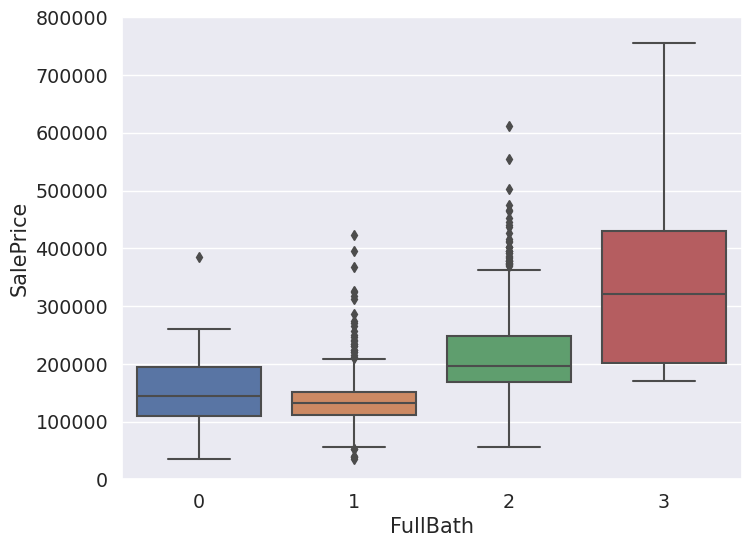

In [17]:
# 'FullBath' correlation
data = pd.concat([train['SalePrice'], train['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['FullBath'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

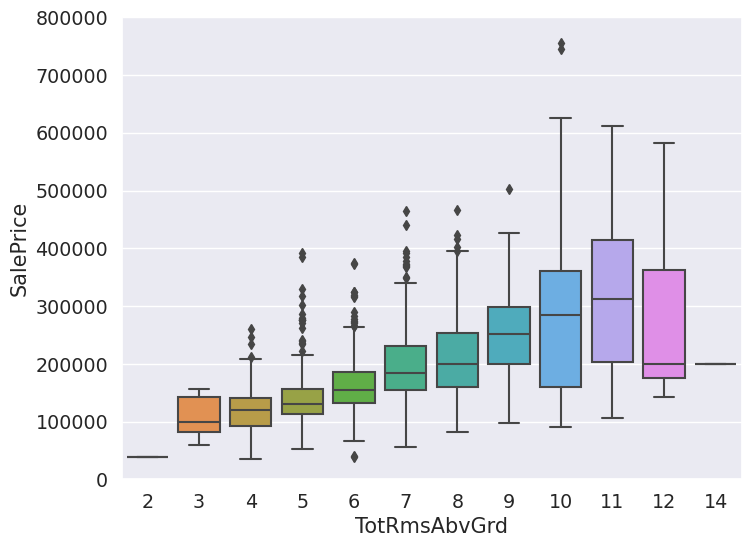

In [18]:
# 'TotRmsAbvGrd' correlation
data = pd.concat([train['SalePrice'], train['TotRmsAbvGrd']], axis=1)
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['TotRmsAbvGrd'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

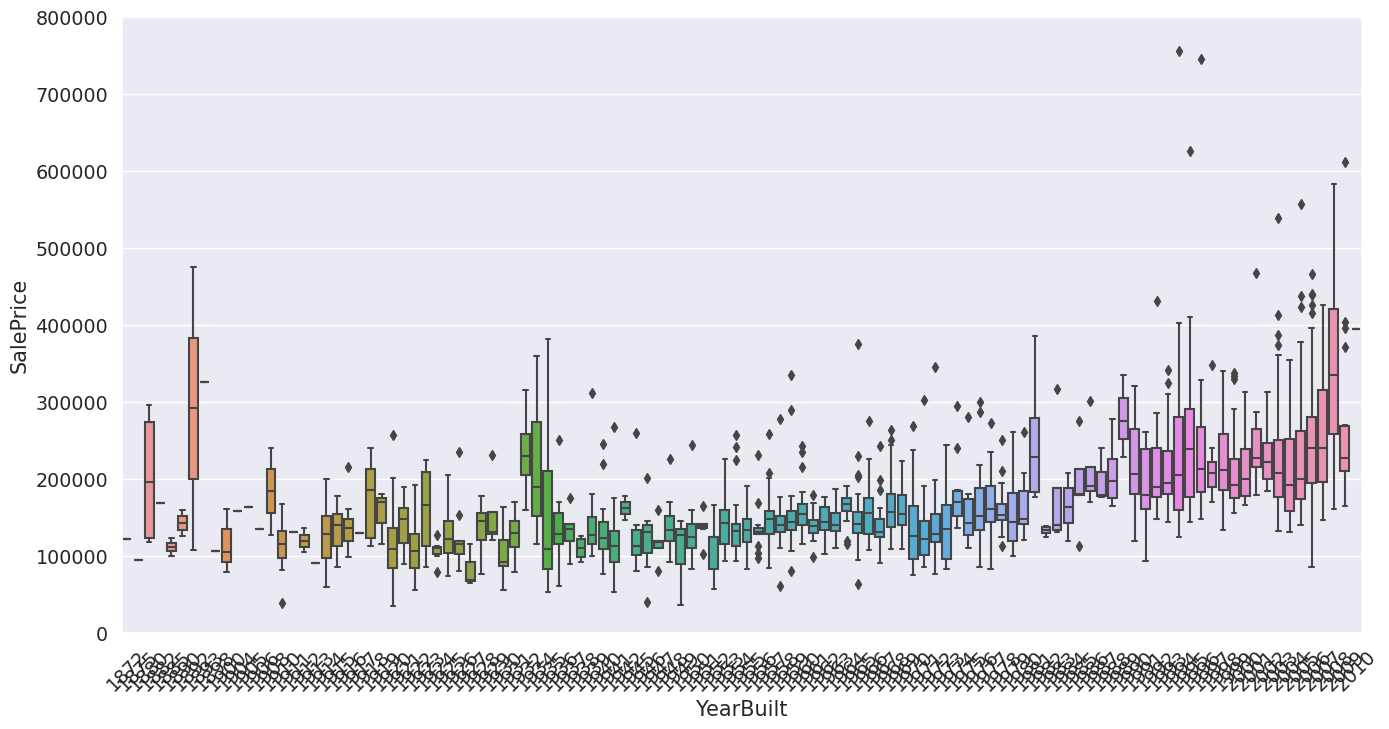

In [19]:
# 'YearBuilt' correlation
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=train['YearBuilt'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=45)

# Feature Engineering

In [20]:
# Since the 'SalePrice' is skewed to the right, log transformation
train["SalePrice"] = np.log1p(train["SalePrice"])


 mu = 12.02 and sigma = 0.40


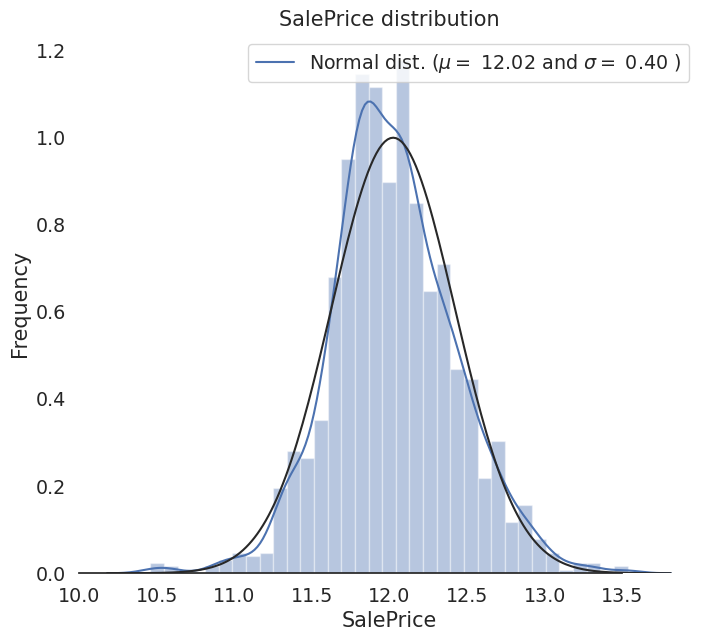

In [21]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm, color="b")

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [22]:
# Remove outliers
# GrLivArea
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)

# GarageArea
train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<300000)].index, inplace=True)

# TotalBsmtSF
train.drop(train[(train['TotalBsmtSF']>4000)].index, inplace=True)

# 1stFlrSF
train.drop(train[(train['1stFlrSF']>4000)].index, inplace=True)

# OverallQual
train.drop(train[(train['OverallQual']<5) & (train['SalePrice'] > 250000)].index, inplace=True)

train.drop(train[(train['OverallQual']==10) & (train['SalePrice'] > 700000)].index, inplace=True)

# GarageCars
train.drop(train[(train['GarageCars']==3) & (train['SalePrice'] > 700000)].index, inplace=True)

# YearBuilt
train.drop(train[(train['YearBuilt'] < 1999) & (train['SalePrice'] > 600000)].index, inplace=True) 
train.reset_index(drop=True, inplace=True)


In [23]:
train.shape


(1454, 80)

In [24]:
# Splitting 'SalePrice' from training set
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine dataset for feature transformation
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)


In [25]:
all_features.shape

(2913, 79)

### Missing Values

In [26]:
def percent_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_df = percent_missing(all_features)
missing_df.head(40)

Total   Percent
PoolQC         2904  0.996910
MiscFeature    2809  0.964298
Alley          2715  0.932029
Fence          2342  0.803982
MasVnrType     1765  0.605905
FireplaceQu    1419  0.487127
LotFrontage     485  0.166495
GarageYrBlt     159  0.054583
GarageFinish    159  0.054583
GarageQual      159  0.054583
GarageCond      159  0.054583
GarageType      157  0.053896
BsmtExposure     82  0.028150
BsmtCond         82  0.028150
BsmtQual         81  0.027806
BsmtFinType2     80  0.027463
BsmtFinType1     79  0.027120
MasVnrArea       23  0.007896
MSZoning          4  0.001373
BsmtHalfBath      2  0.000687
Utilities         2  0.000687
BsmtFullBath      2  0.000687
Functional        2  0.000687
TotalBsmtSF       1  0.000343
BsmtFinSF1        1  0.000343
SaleType          1  0.000343
BsmtFinSF2        1  0.000343
GarageCars        1  0.000343
Exterior2nd       1  0.000343
Exterior1st       1  0.000343
GarageArea        1  0.000343
KitchenQual       1  0.000343
BsmtUnfSF         1  0.000343
Electrical        1  0.000343
Fireplaces        0  0.000000
TotRmsAbvGrd      0  0.000000
MSSubClass        0  0.000000
BedroomAbvGr      0  0.000000
PavedDrive        0  0.000000
WoodDeckSF        0  0.000000

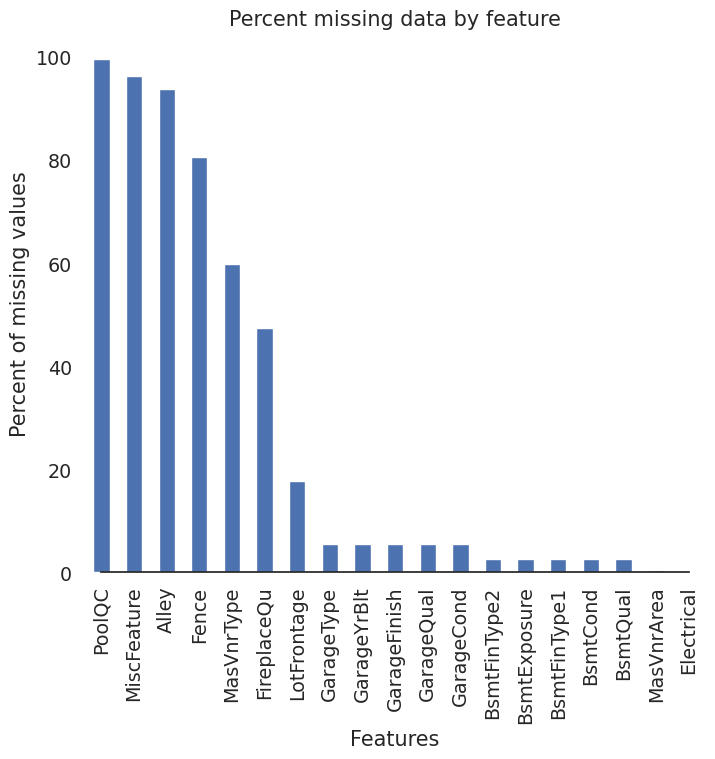

In [27]:
### Visualize missing values
sns.set_style("white")
_, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
missing.plot.bar(color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [28]:
# Transform numerical variables that are actually categorical

# Building class
all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)

# Overall Condition should be categorical
all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)

# Year and month sold are also the same
all_features['YrSold'] = all_features['YrSold'].astype(str)
all_features['MoSold'] = all_features['MoSold'].astype(str)

### Adding missing value

In [29]:

# PoolQC : "No Pool". 
all_features["PoolQC"] = all_features["PoolQC"].fillna("None")

# MiscFeature: NA means "no misc feature"
all_features["MiscFeature"] = all_features["MiscFeature"].fillna("None")

# Alley: NA means "no alley access"
all_features["Alley"] = all_features["Alley"].fillna("None")

# Fence: NA means "no fence"
all_features["Fence"] = all_features["Fence"].fillna("None")

# MasVnrArea and MasVnrType: NA most likely means no masonry veneer for these houses.
all_features["MasVnrType"] = all_features["MasVnrType"].fillna("None")
all_features["MasVnrArea"] = all_features["MasVnrArea"].fillna(0)

# FireplaceQu: NA means "no fireplace"
all_features["FireplaceQu"] = all_features["FireplaceQu"].fillna("None")

# LotFrontage: fill in missing values by the median LotFrontage of the neighborhood.
all_features["LotFrontage"] = all_features.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_features[col] = all_features[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_features[col] = all_features[col].fillna(0)
    
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_features[col] = all_features[col].fillna(0)
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : Nan mean no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_features[col] = all_features[col].fillna('None')

# MSZoning: fill in missing value with most common value
all_features['MSZoning'] = all_features['MSZoning'].fillna(all_features['MSZoning'].mode()[0])

# Utilities: Won't help in prediction
all_features = all_features.drop(['Utilities'], axis=1)

# Functional: NA means typical
all_features["Functional"] = all_features["Functional"].fillna("Typ")

# Electrical: fill in with most common value.
all_features['Electrical'] = all_features['Electrical'].fillna(all_features['Electrical'].mode()[0])

# KitchenQual
all_features['KitchenQual'] = all_features['KitchenQual'].fillna(all_features['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd: fill in with most common value.
all_features['Exterior1st'] = all_features['Exterior1st'].fillna(all_features['Exterior1st'].mode()[0])
all_features['Exterior2nd'] = all_features['Exterior2nd'].fillna(all_features['Exterior2nd'].mode()[0])

# SaleType: Fill in again with most frequent which is "WD"
all_features['SaleType'] = all_features['SaleType'].fillna(all_features['SaleType'].mode()[0])

# MSSubClass: Na means No building class
all_features['MSSubClass'] = all_features['MSSubClass'].fillna("None")

In [30]:
# Visualize missing value after making changes
missing_df = percent_missing(all_features)
missing_df.head(40)

Total  Percent
MSSubClass         0      0.0
BedroomAbvGr       0      0.0
GarageType         0      0.0
FireplaceQu        0      0.0
Fireplaces         0      0.0
Functional         0      0.0
TotRmsAbvGrd       0      0.0
KitchenQual        0      0.0
KitchenAbvGr       0      0.0
HalfBath           0      0.0
GarageFinish       0      0.0
FullBath           0      0.0
BsmtHalfBath       0      0.0
BsmtFullBath       0      0.0
GrLivArea          0      0.0
LowQualFinSF       0      0.0
2ndFlrSF           0      0.0
1stFlrSF           0      0.0
GarageYrBlt        0      0.0
GarageCars         0      0.0
MSZoning           0      0.0
PoolArea           0      0.0
SaleType           0      0.0
YrSold             0      0.0
MoSold             0      0.0
MiscVal            0      0.0
MiscFeature        0      0.0
Fence              0      0.0
PoolQC             0      0.0
ScreenPorch        0      0.0
GarageArea         0      0.0
3SsnPorch          0      0.0
EnclosedPorch      0      0.0
OpenPorchSF        0      0.0
WoodDeckSF         0      0.0
PavedDrive         0      0.0
GarageCond         0      0.0
GarageQual         0      0.0
Electrical         0      0.0
CentralAir         0      0.0

In [31]:
# Find skewed features

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)
        
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.75]
skew_index = high_skew.index

skewness = pd.DataFrame({'Skew' : high_skew})
skewness.head(10)

Skew
MiscVal        21.934376
PoolArea       17.676417
LotArea        13.162340
LowQualFinSF   12.076090
3SsnPorch      11.364106
KitchenAbvGr    4.297140
BsmtFinSF2      4.141222
EnclosedPorch   3.999248
ScreenPorch     3.941914
BsmtHalfBath    3.926798

In [32]:
# Normalize skewed features
for i in skew_index:
    all_features[i] = boxcox1p(all_features[i], 0.15)

# Combining add features

In [33]:
all_features['BsmtFinType1_Unf'] = 1*(all_features['BsmtFinType1'] == 'Unf')
all_features['HasWoodDeck'] = (all_features['WoodDeckSF'] == 0) * 1
all_features['HasOpenPorch'] = (all_features['OpenPorchSF'] == 0) * 1
all_features['HasEnclosedPorch'] = (all_features['EnclosedPorch'] == 0) * 1
all_features['Has3SsnPorch'] = (all_features['3SsnPorch'] == 0) * 1
all_features['HasScreenPorch'] = (all_features['ScreenPorch'] == 0) * 1

all_features['YearsSinceRemodel'] = all_features['YrSold'].astype(int) - all_features['YearRemodAdd'].astype(int)
all_features['Total_Home_Quality'] = all_features['OverallQual'] + all_features['OverallCond']
all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']

all_features['TotalSF'] = all_features['TotalBsmtSF'] + all_features['1stFlrSF'] + all_features['2ndFlrSF']

all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] + all_features['BsmtFinSF2'] +
                                     all_features['1stFlrSF'] + all_features['2ndFlrSF'])
all_features['Total_Bathrooms'] = (all_features['FullBath'] + (0.5 * all_features['HalfBath']) +
                                   all_features['BsmtFullBath'] + (0.5 * all_features['BsmtHalfBath']))
all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] + all_features['3SsnPorch'] +
                                  all_features['EnclosedPorch'] + all_features['ScreenPorch'] +
                                  all_features['WoodDeckSF'])

all_features['HasPool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['Has2ndFlr'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['HasGarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['HasBsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['HasFirePlace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

### Encode categorical features

In [34]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features = all_features.loc[:,~all_features.columns.duplicated()]

# Feature set after data engineering

In [35]:
all_features.shape

(2913, 346)

In [36]:
all_features.head()

LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     5.831328  19.212182            7            5       2003          2003   
1     6.221214  19.712205            6            8       1976          1976   
2     5.914940  20.347241            7            5       2001          2002   
3     5.684507  19.691553            7            5       1915          1970   
4     6.314735  21.325160            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0    8.059126   11.170327         0.0   7.483296  ...           False   
1    0.000000   12.062832         0.0   8.897844  ...           False   
2    7.646538   10.200343         0.0   9.917060  ...           False   
3    0.000000    8.274266         0.0  10.468500  ...           False   
4    9.391827   10.971129         0.0  10.221051  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0         False         False         True                  False   
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                   True   
4         False         False         True                  False   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 346 columns]

# Model training

In [37]:
X = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1454, 346), (1454,), (1459, 346))

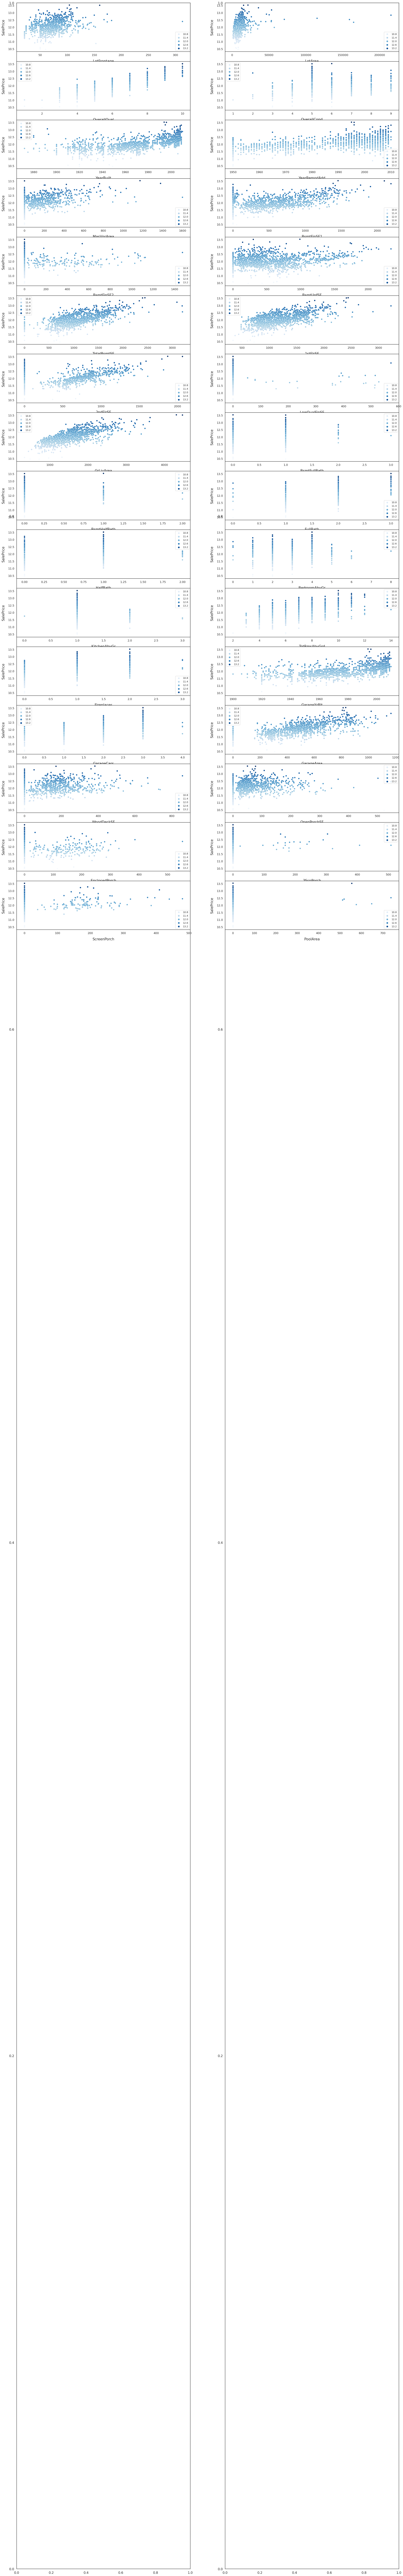

In [38]:
# Visualize training data (numeric data)
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','HasPool','HasGarage','HasBsmt','HasFirePlace']:
            pass
        else:
            numeric.append(i)
        # visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 80))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(X[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 2, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=train)

    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)

    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)

    plt.legend(loc='best', prop={'size': 10})

plt.show()

In [39]:
# Modeling
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet, Lasso  

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [40]:
# Setup Validation
kf = KFold(n_splits=12, random_state=42, shuffle=True)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return rmse

In [41]:
# Preparing Model

# Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

# Elastic Net Regression
enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

# XGBoost
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                           max_depth=15,
                           min_samples_split=5,
                           min_samples_leaf=5,
                           max_features=None,
                           oob_score=True,
                           random_state=42)

In [42]:
# Create cross validation scores for get more accurate evaluation of the model performance
models = {'Lasso Regression': lasso, 'Elastic Net Regression': enet,'XGBoost':xgboost, 'Random Forest Regressor': rf}
scores = {}
for name, model in models.items():
    score = cv_rmse(model)
    print(f'{name}: {score.mean():.4f} ({score.std():.4f})')
    scores[name] = (score.mean(), score.std())



Lasso Regression: 0.1090 (0.0093)
Elastic Net Regression: 0.1090 (0.0091)
[22:20:42] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:00] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:19] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:38] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:58] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:22:21] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squa

In [43]:
data = {}
for name, model in models.items():
    data[name] = model.fit(X, train_labels)

[22:31:47] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


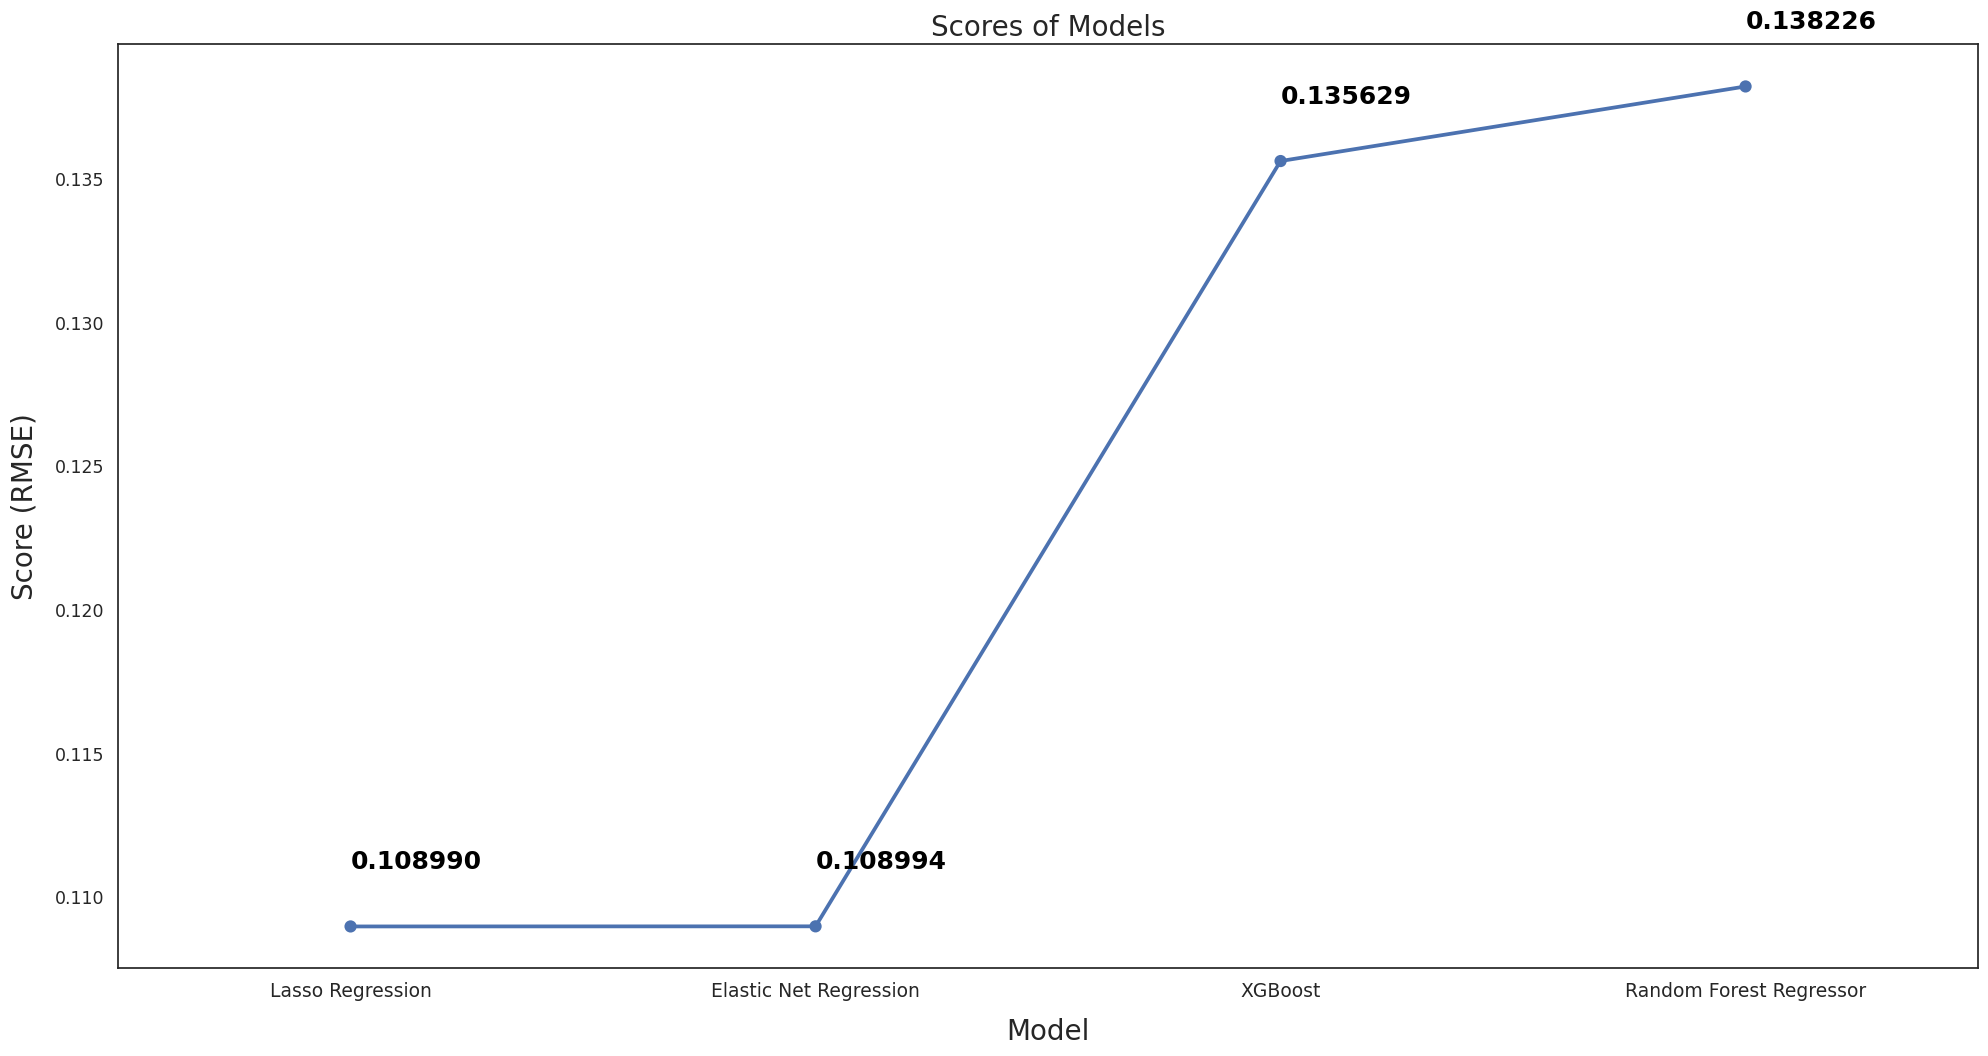

In [45]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [46]:
# Creating submission
submission = pd.read_csv("./input/sample_submission.csv")
submission.iloc[:, 1] = np.floor(np.expm1(rf.predict(X_test)))

submission.to_csv("submission_regression1.csv", index=False)